In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [188]:
df = pd.read_csv('/content/car_dataset_india.csv')

In [ ]:
df

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Tata Motors,Altroz,2021,CNG,Automatic,1900000.0,24.9,2500,7,7100.0
9996,9997,Honda,WR-V,2024,Diesel,Automatic,1270000.0,21.4,1000,6,18300.0
9997,9998,Mahindra,XUV300,2020,Electric,Manual,3050000.0,27.0,1200,4,7700.0
9998,9999,Renault,Duster,2020,Diesel,Manual,2390000.0,24.3,1800,7,15700.0


In [ ]:
df.head(10)

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0
5,6,Kia,Sonet,2020,Petrol,Manual,2780000.0,21.5,1800,7,23700.0
6,7,Toyota,Glanza,2019,CNG,Manual,2270000.0,29.7,1500,7,13300.0
7,8,Volkswagen,Taigun,2017,CNG,Manual,2770000.0,20.2,1800,4,10200.0
8,9,Renault,Lodgy,2015,Petrol,Manual,2180000.0,10.5,1800,5,18900.0
9,10,Kia,EV6,2019,CNG,Automatic,990000.0,16.1,1800,6,15400.0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            10000 non-null  int64  
 1   Brand             10000 non-null  object 
 2   Model             10000 non-null  object 
 3   Year              10000 non-null  int64  
 4   Fuel_Type         10000 non-null  object 
 5   Transmission      10000 non-null  object 
 6   Price             10000 non-null  float64
 7   Mileage           10000 non-null  float64
 8   Engine_CC         10000 non-null  int64  
 9   Seating_Capacity  10000 non-null  int64  
 10  Service_Cost      10000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [ ]:
df.isnull()

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Fuel_Type,0
Transmission,0
Price,0
Mileage,0
Engine_CC,0
Seating_Capacity,0


In [ ]:
df.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Fuel_Type', 'Transmission',
       'Price', 'Mileage', 'Engine_CC', 'Seating_Capacity', 'Service_Cost'],
      dtype='object')

In [ ]:
df.describe()

,Car_ID,Year,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2019.543800,1.946064e+06,19.967300,1542.070000,5.515400,14969.130000
std,2886.89568,2.877553,8.837945e+05,5.778583,557.487394,1.121556,5777.753741
min,1.00000,2015.000000,4.000000e+05,10.000000,800.000000,4.000000,5000.000000
25%,2500.75000,2017.000000,1.180000e+06,14.900000,1000.000000,5.000000,9900.000000
50%,5000.50000,2020.000000,1.950000e+06,20.000000,1500.000000,6.000000,15000.000000
75%,7500.25000,2022.000000,2.700000e+06,25.000000,2000.000000,7.000000,20000.000000
max,10000.00000,2024.000000,3.500000e+06,30.000000,2500.000000,7.000000,25000.000000


EXPLORATORY DATA ANALYSIS


In [139]:
df.duplicated().sum()

0

In [141]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")
    print(df[col].value_counts())


Unique values in Model: ['Innova' 'EV6' 'Dzire' 'Amaze' 'City' 'Sonet' 'Glanza' 'Taigun' 'Lodgy'
 'Jazz' 'Civic' 'Kiger' 'Scorpio' 'Punch' 'Fortuner' 'Kushaq' 'Tiago'
 'Superb' 'Camry' 'XUV700' 'Ertiga' 'Altroz' 'Harrier' 'Carnival' 'Polo'
 'Swift' 'Verna' 'Slavia' 'Nexon' 'Virtus' 'Tiguan' 'Octavia' 'Seltos'
 'Bolero' 'Thar' 'i10' 'Venue' 'Rapid' 'Creta' 'WR-V' 'XUV300' 'i20'
 'Urban Cruiser' 'Vento' 'Baleno' 'Carens' 'Kwid' 'Duster' 'Triber'
 'WagonR']
Model
Amaze            239
Taigun           227
i10              221
Kushaq           218
Scorpio          218
Dzire            217
Venue            216
Tiago            216
Sonet            214
Ertiga           212
Swift            211
Thar             210
Vento            208
Duster           207
XUV300           205
Virtus           205
Carnival         205
Superb           204
Octavia          202
WagonR           202
XUV700           201
Jazz             201
Innova           201
Verna            200
Baleno           200
Fortuner  

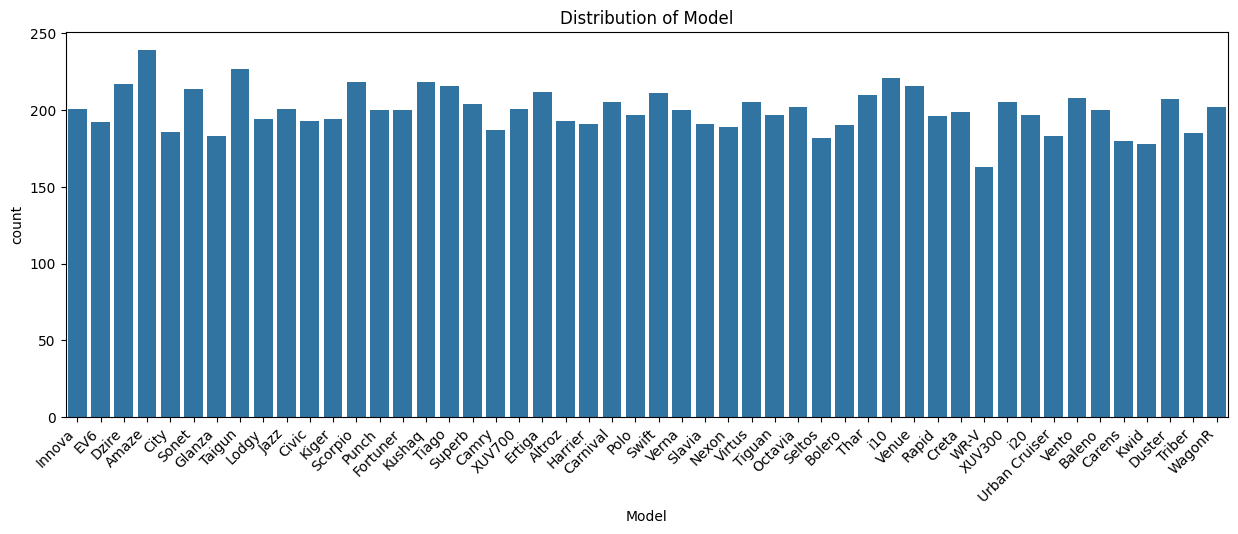

In [144]:
plt.figure(figsize=(15, 5))
sns.countplot(x=col, data=df)
plt.title(f'Distribution of {col}')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [145]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    print(f"Descriptive statistics for {col}:\n{df[col].describe()}")

Descriptive statistics for Car_ID:
count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: Car_ID, dtype: float64
Descriptive statistics for Brand:
count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Brand, dtype: float64
Descriptive statistics for Year:
count    10000.000000
mean      2019.543800
std          2.877553
min       2015.000000
25%       2017.000000
50%       2020.000000
75%       2022.000000
max       2024.000000
Name: Year, dtype: float64
Descriptive statistics for Fuel_Type:
count    10000.000000
mean         1.478200
std          1.119129
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Fuel_Type, dtype: float64
Descriptive statistics for Transmission:
count    10000.000000
mean         0.504500
std

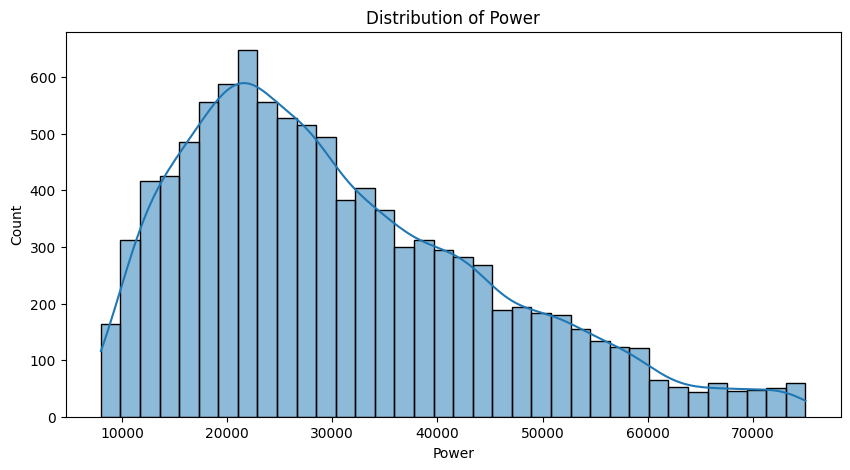

In [146]:
plt.figure(figsize=(10, 5))
sns.histplot(df[col], kde=True)
plt.title(f'Distribution of {col}')
plt.show()

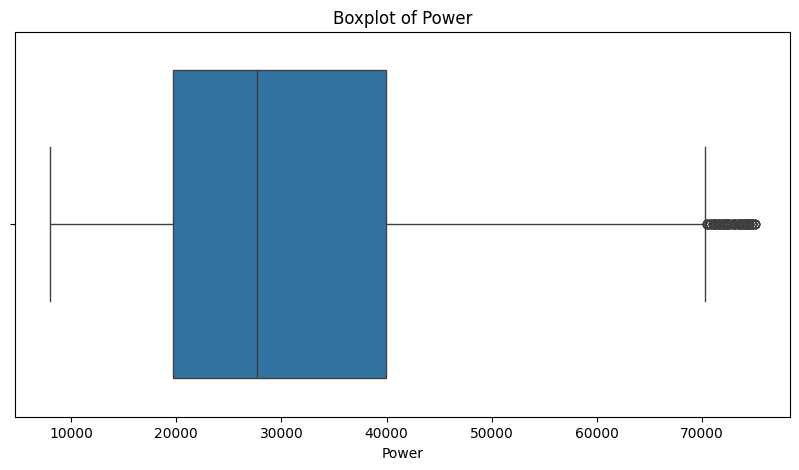

In [147]:
plt.figure(figsize=(10,5))
sns.boxplot(x = col, data = df)
plt.title(f'Boxplot of {col}')
plt.show()

In [155]:
df[col] = pd.to_numeric(df[col], errors='coerce')


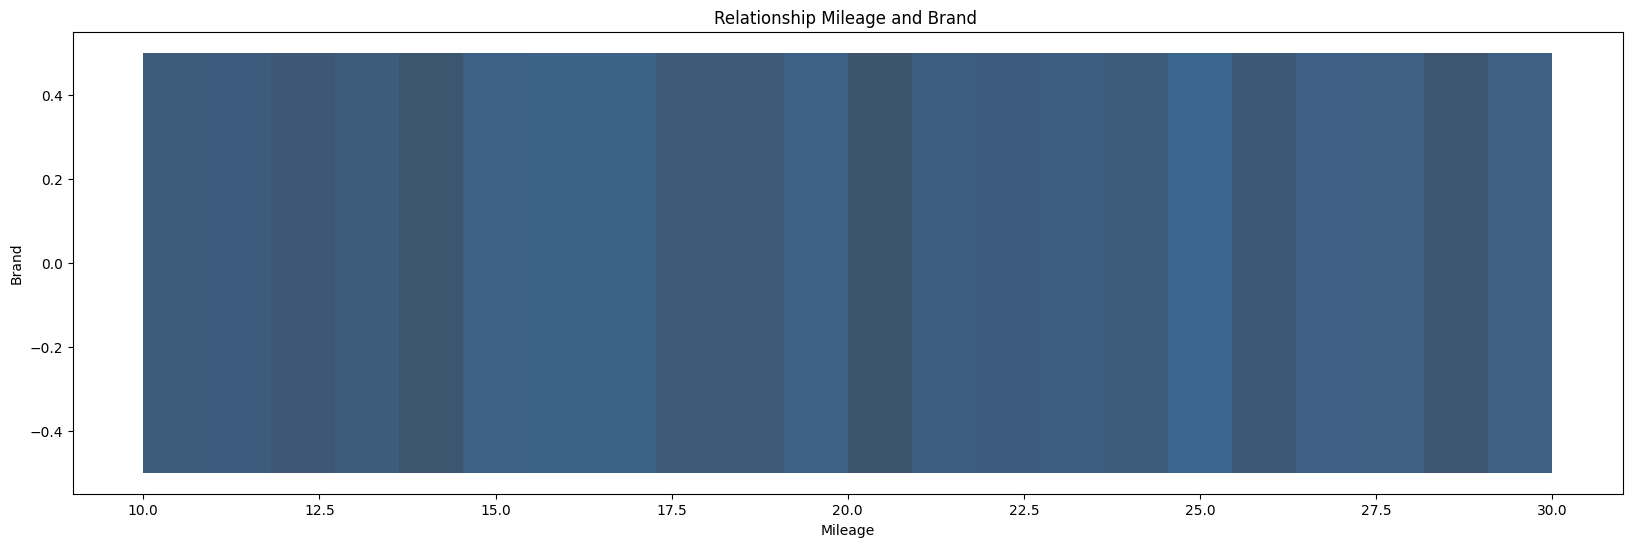

In [174]:
plt.figure(figsize=(20,6))
sns.histplot  (x='Mileage', y='Brand', data=df)
plt.title('Relationship Mileage and Brand ')
plt.show()


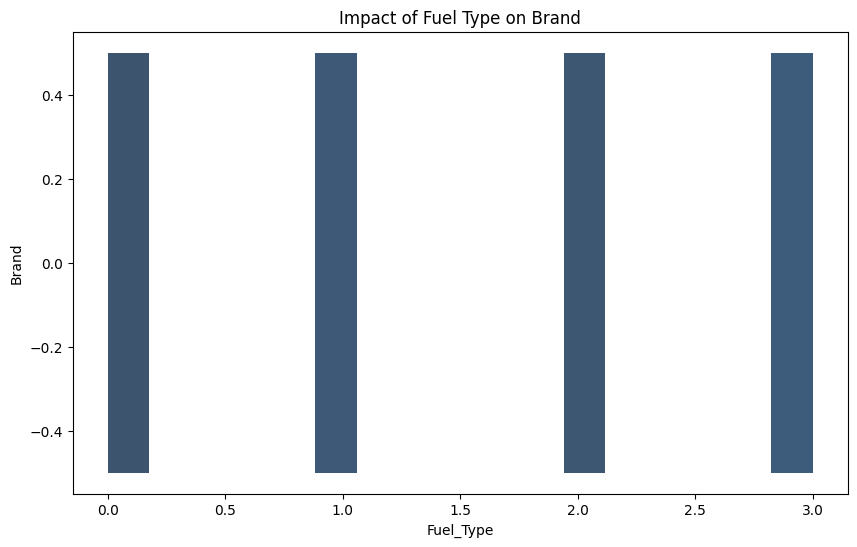

In [175]:
plt.figure(figsize=(10,6))
sns.histplot(x='Fuel_Type', y='Brand', data=df)
plt.title('Impact of Fuel Type on Brand')
plt.show()

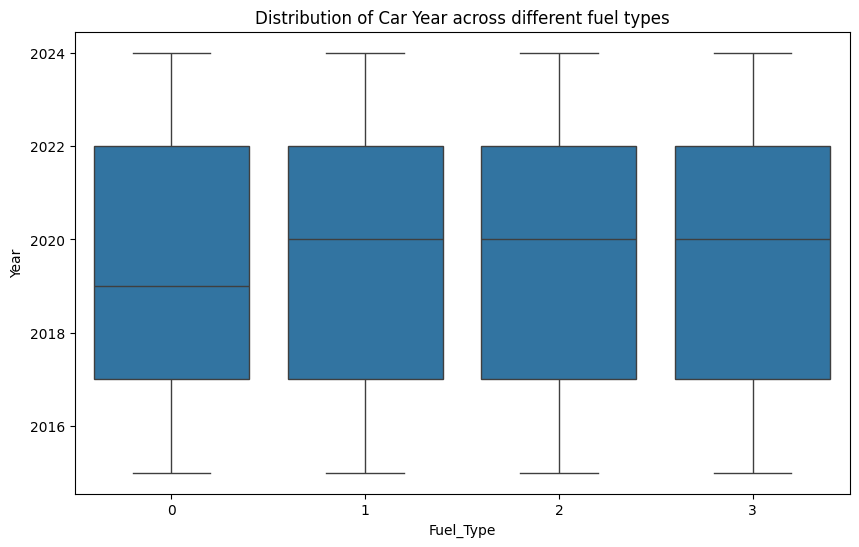

In [173]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fuel_Type', y='Year', data=df)
plt.title('Distribution of Car Year across different fuel types')
plt.show()

FIT THE PREDICTIVE MODEL USING LINEAR REGRESSION

In [180]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [181]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [182]:
X = df.drop('Brand', axis=1)
y = df['Brand']

In [183]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [184]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [185]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [186]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0
R-squared: 1.0


In [189]:
accuracy = accuracy_score(y_test, np.round(y_pred)) # Added np.round to handle potential floating point predictions
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [190]:
matrix = np.random.rand(3, 3)
matrix

array([[0.38105166, 0.55914032, 0.82739793],
       [0.08322176, 0.77875234, 0.55578077],
       [0.50203776, 0.15324509, 0.518147  ]])